In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colorspacious
from matplotlib import animation, colormaps
import colorcet as cc

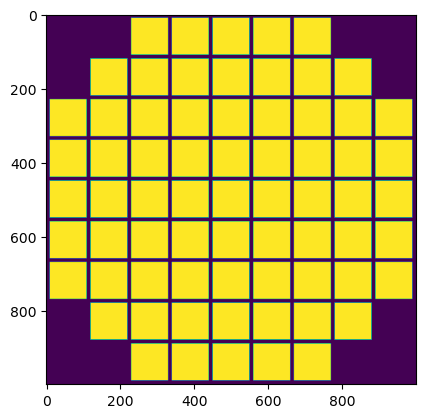

In [3]:
def makegrid(
    shape_plot = (1000,1000),
    shape_im = (100,100),
    bound = 10,
    radius_num = 4.5,
):
    im_plot = np.zeros(shape_plot)
    
    
    # Grid coordinates
    r = np.arange(-np.ceil(radius_num),np.ceil(np.ceil(radius_num)+1))
    xa,ya = np.meshgrid(r,r)
    keep = xa**2+ya**2 < radius_num**2
    xi = xa[keep]
    yi = ya[keep]
    
    # Loop over images
    for ind in range(xi.shape[0]):
        xc = shape_plot[0]//2 + (shape_im[0]+bound)*xi[ind]
        yc = shape_plot[1]//2 + (shape_im[1]+bound)*yi[ind]
        im_plot[
            (xc - shape_im[0]//2).astype("int") : (xc+shape_im[0]//2).astype("int"),
            (yc - shape_im[1]//2).astype("int") : (yc+shape_im[1]//2).astype("int")
            ] = 1
    
    fig,ax = plt.subplots()
    ax.imshow(im_plot)
    

makegrid()
    

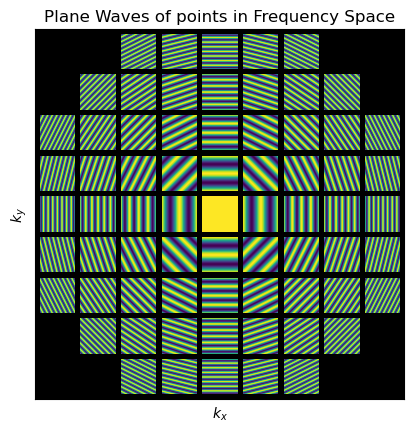

In [20]:
def makegridFrequency(
    shape_plot = (1000,1000),
    shape_im = (100,100),
    bound = 10,
    radius_num = 4.5,
    freqSpace = 2
):
    im_plot = np.empty(shape_plot,dtype=np.complex128)
    im_plot[:] = np.nan
    
    
    # Grid coordinates
    r = np.arange(-np.ceil(radius_num),np.ceil(np.ceil(radius_num)+1))
    xa,ya = np.meshgrid(r,r)
    keep = xa**2+ya**2 < radius_num**2
    xi = xa[keep]
    yi = ya[keep]
    
    # Image Location Generation
    array = np.zeros(shape_im)
    array[(0,0)] = 1
    
    # Loop over images
    for ind in range(xi.shape[0]):
        xc = shape_plot[0]//2 + (shape_im[0]+bound)*xi[ind]
        yc = shape_plot[1]//2 + (shape_im[1]+bound)*yi[ind]
        im_plot[
            (xc - shape_im[0]//2).astype("int") : (xc+shape_im[0]//2).astype("int"),
            (yc - shape_im[1]//2).astype("int") : (yc+shape_im[1]//2).astype("int")
            ] = np.fft.fft2(np.roll(array,(int(freqSpace*xi[ind]),int(freqSpace*yi[ind])),(0,1)))
    
    fig,ax = plt.subplots()
    cmap = colormaps.get_cmap('viridis')
    cmap.set_bad("black")
    ax.set_title("Plane Waves of points in Frequency Space")
    ax.set_ylabel("$k_{y}$")
    ax.set_xlabel("$k_{x}$")
    ax.imshow(np.real(im_plot),cmap=cmap)
    
    ax.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
    fig.savefig("planeWaves.png")

makegridFrequency()